# Homework 1 part 2: Fiona and shapefile basics
### Cleaned notebook by Jamie Song for MUSA 6950

## Using Fiona to manipuate shapefiles and do spatial analysis

Fiona is an excellant tool for spatial manipulation. This session show you how to use fiona to read and write shapefiles. Shapely and Fiona. These libraries are essentially wrappers for GEOS and OGR, respectively, which provide clean, Pythonic interfaces for performing the processing, while still keeping the performance capabilities of the underlying libraries.

This session will just include how to use fiona to open shapefile. We will do more advanced analysis next week using `Fiona`



References:

Pandas Tutorial, https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

Fiona Manual, http://toblerity.org/fiona/manual.html


In [ ]:
# uncomment to install fiona and rtree
!pip install fiona
!pip install rtree

#### 1. Read the metadata of shapefiles using `fiona`
You may find the `geopandas` is not flexible in many cases. Sometime you get error message using `geopandas`, it is very difficult to debug, because you don't know how `geopandas` conduct the spatial operations. Here we introduce a lower level module `fiona` and `shapely`, which will give you more flexibility, but also a little big difficulty. Actually `geopandas` is developed on top of `fiona` and `shapely`. 

Read shapefile and loop all features

In [2]:
# get the meta data of shapefile, such as spatial reference, field names, etc
import fiona
from fiona.crs import to_string
from shapely.geometry import mapping, shape

neighborhood_shp = 'data/census-tract-data.shp'

with fiona.open(neighborhood_shp, 'r') as nb_lyr:
    driver = nb_lyr.driver # the driver of the shapefile
    schema = nb_lyr.schema  #schema of shapefile
    crs = nb_lyr.crs   # coordinate reference system of the shapefile
    meta = nb_lyr.meta # more details about the metadata of the shapefile


Let's take a look at what those metadata look like

In [3]:
print ('The driver is:', driver)
print ('The schema is:', schema)
print ('The coordinate reference system is:', crs)
print ('the metadata is:', meta)

The driver is: ESRI Shapefile
The schema is: {'properties': {'STATEFP': 'str:80', 'COUNTYFP': 'str:80', 'TRACTCE': 'str:80', 'GEOID': 'str:80', 'NAME_x': 'str:80', 'NAMELSAD': 'str:80', 'MTFCC': 'str:80', 'FUNCSTAT': 'str:80', 'ALAND': 'int:18', 'AWATER': 'int:18', 'INTPTLAT': 'str:80', 'INTPTLON': 'str:80', 'NAME_y': 'str:80', 'GEO_ID': 'str:80', 'white_popu': 'str:80', 'non-hispan': 'str:80', 'black_popu': 'str:80', 'asian_popu': 'str:80', 'hispanic_p': 'str:80', 'total_popu': 'str:80', 'median_hou': 'str:80', 'per_capita': 'str:80', 'built_age': 'str:80', 'less_highs': 'str:80', 'bachelor': 'str:80', 'totaleduca': 'str:80', 'male_und18': 'str:80', 'female_und': 'str:80', 'male65_66': 'str:80', 'male67_69': 'str:80', 'male70_74': 'str:80', 'male75_79': 'str:80', 'male80_84': 'str:80', 'male85_': 'str:80', 'fema_65_66': 'str:80', 'fema_67_69': 'str:80', 'fema70_74': 'str:80', 'fema75_79': 'str:80', 'fema80_84': 'str:80', 'fema85_': 'str:80', 'state': 'str:80', 'county': 'str:80', 'tra

Let's print the geometry and attribute of the features in shapefile

In [4]:
with fiona.open(neighborhood_shp, 'r') as nb_lyr:
    for feat in nb_lyr:
        # attribute of the neighborhood features
        attr = feat['properties']
        name = attr['TRACTCE']  #you can find other attribute based on the metadata of the shapefile
        # print ('The neighborhod is:', name)
        
        # get the geometry of the polygon feature
        geom = feat['geometry']
#         print ('geom is:', geom)
        

Here you may find we are using dictionary to manage the metadata and the geometry of each feature in the shapefile

In [5]:
feat

In [6]:
feat['properties'].items()

ItemsView(<fiona.model.Properties object at 0x10567bd90>)

List all the items

In [7]:
dict(feat['properties'].items())

{'STATEFP': '42',
 'COUNTYFP': '101',
 'TRACTCE': '031502',
 'GEOID': '42101031502',
 'NAME_x': '315.02',
 'NAMELSAD': 'Census Tract 315.02',
 'MTFCC': 'G5020',
 'FUNCSTAT': 'S',
 'ALAND': 578102,
 'AWATER': 0,
 'INTPTLAT': '+40.0392658',
 'INTPTLON': '-075.0548693',
 'NAME_y': 'Census Tract 315.02, Philadelphia County, Pennsylvania',
 'GEO_ID': '1400000US42101031502',
 'white_popu': '2441',
 'non-hispan': '2258',
 'black_popu': '843',
 'asian_popu': '676',
 'hispanic_p': '510',
 'total_popu': '4461',
 'median_hou': '43190',
 'per_capita': '18873',
 'built_age': '1627',
 'less_highs': '600',
 'bachelor': '348',
 'totaleduca': '3120',
 'male_und18': '530',
 'female_und': '535',
 'male65_66': '19',
 'male67_69': '101',
 'male70_74': '40',
 'male75_79': '11',
 'male80_84': '15',
 'male85_': '40',
 'fema_65_66': '74',
 'fema_67_69': '21',
 'fema70_74': '51',
 'fema75_79': '48',
 'fema80_84': '31',
 'fema85_': '22',
 'state': '42',
 'county': '101',
 'tract': '031502'}

For the geometry, we can do the same

In [8]:
geom = feat['geometry']
dict(geom)['coordinates']

[[(-75.061043, 40.037980999999995),
  (-75.060386, 40.0386),
  (-75.059801, 40.039152),
  (-75.05910999999999, 40.039803),
  (-75.05879399999999, 40.0401),
  (-75.058555, 40.040310999999996),
  (-75.058504, 40.040358999999995),
  (-75.057182, 40.04161),
  (-75.056709, 40.042058999999995),
  (-75.05654899999999, 40.042218999999996),
  (-75.056122, 40.042645),
  (-75.05594599999999, 40.042831),
  (-75.05561, 40.043186999999996),
  (-75.05492699999999, 40.043853999999996),
  (-75.054287, 40.044447999999996),
  (-75.054262, 40.044435),
  (-75.05406099999999, 40.044325),
  (-75.053114, 40.043763999999996),
  (-75.052228, 40.043271),
  (-75.05215299999999, 40.043209999999995),
  (-75.051425, 40.042788),
  (-75.050643, 40.042333),
  (-75.049027, 40.041412),
  (-75.04911, 40.041337),
  (-75.049596, 40.040805999999996),
  (-75.050091, 40.040285),
  (-75.050617, 40.039736),
  (-75.05122, 40.039091),
  (-75.05151599999999, 40.038778),
  (-75.0518, 40.038475999999996),
  (-75.05239399999999, 40.03

We can also visualize the shape using the submodule `shape` in the module of `shapely`

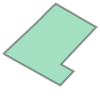

In [9]:
shape(geom)

Buffer analysis

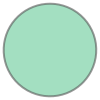

In [10]:
shape(geom).buffer(10)

What? Why has it become a round circle? This is because the unit is the degree, 10-degree is a pretty large distance. We need to reproject the geometry into the local projection with the unit of `m` or `ft`

Reproject feature using `pyproj`

In [11]:
from pyproj import Transformer
from shapely.ops import transform

# Define a transformer to convert from EPSG:4326 to EPSG:3857
transformer = Transformer.from_crs("EPSG:4269", "EPSG:2272", always_xy=True)

# Reproject the geometry
reprojected_geom = transform(transformer.transform, shape(geom))

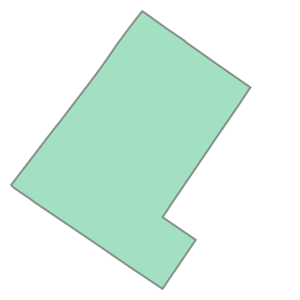

In [12]:
reprojected_geom

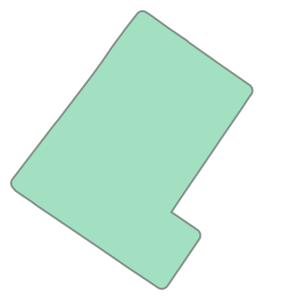

In [13]:
reprojected_geom.buffer(100)

Write a shapefile using `fiona`, let save the buffered shapefile

In [ ]:
from shapely.geometry import Point, mapping
import pandas

# prepare the schema and crs of the output shapefile
schema = {
    'geometry': 'Point',
    'properties': {
        'id': 'str: 20',
        'name': 'str: 20',
        'address': 'str: 20',
        'city': 'str: 20',
        'state':'str: 20',
        'zip': 'str: 7'
    }
}

crs = {'init': u'epsg:4326'}

# read the CSV file using pandas
coffee_shop_sheet = pandas.read_csv('data/cambridge_coffee_shops.csv')


# The output shapefile
coffee_shop_shp = 'data/cambridge_coffee_shops2.shp' 

with fiona.open(coffee_shop_shp, 'w', driver = "ESRI Shapefile", crs = crs, schema=schema) as output:
    for row in coffee_shop_sheet.iterrows():
        lon = row[1][7]
        lat = row[1][6]
        
        id_ = row[1][0]
        name = row[1][1]
        address = row[1][2]
        city = row[1][3]
        state = row[1][4]
        zipcode = row[1][5]
        
        point = Point(float(lon), float(lat))
        output.write({'properties':{'id': id_,
                                    'name': name,
                                    'address': address,
                                    'city': city,
                                    'state': state,
                                    'zip': zipcode
                                    },
                      'geometry': mapping(point)
                     })
        
print ('You have export the shapefile successfully')

In [ ]:
# # Update the feature geometry with the reprojected geometry
# feature["geometry"] = mapping(reprojected_geom)

# # Write the feature to the output shapefile
# dst.write(feature)